### Import neccessary libraries in Python for my analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
sns.set_style("darkgrid") 
sns.set_context("notebook")
%matplotlib inline

## Loading data

Loading CNR data

In [2]:
data = pd.read_csv('data.csv')

Below I show the first five rows of my data that comprises of the target variable(y) and independent variables(x1-x8)

In [3]:
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8
0,32.175299,0.592109,0.545496,0.199054,2.370339,1.032510,1.137605,1.199802,-0.833456
1,6.521285,0.911316,1.260952,0.446375,1.564526,0.820080,2.172268,1.441165,-0.373705
2,5.688139,0.968683,3.744257,1.931173,1.472553,0.102181,4.712941,1.954805,1.828992
3,8.488786,0.748656,2.741351,1.790573,1.696788,0.464028,3.490008,0.948294,1.326545
4,63.570984,0.320502,3.196858,1.050494,2.813036,0.204284,3.517361,1.273237,0.846210


Below is a summary about the data types, count of every feature in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       150 non-null    float64
 1   x1      150 non-null    float64
 2   x2      150 non-null    float64
 3   x3      150 non-null    float64
 4   x4      150 non-null    float64
 5   x5      150 non-null    float64
 6   x6      150 non-null    float64
 7   x7      150 non-null    float64
 8   x8      150 non-null    float64
dtypes: float64(9)
memory usage: 10.7 KB


I check for the dimension of the dataset (150 observations, 9 features )

In [5]:
data.shape

(150, 9)

### Checking the target

Below I extract the target variable from the data

In [6]:
y = data.y.to_frame(name = "target") #Coverted the target series to a dataframe 

In [7]:
y.head() #The first five rows of the target variable

,target
0,32.175299
1,6.521285
2,5.688139
3,8.488786
4,63.570984


**Frequency distribution of the target variable using the seaborn visualization library**

Text(0.5, 1.0, 'Frequency Distribution of the Target Variable')

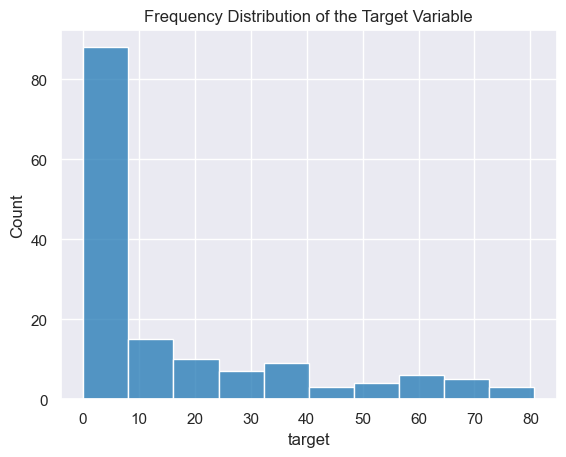

In [8]:
sns.histplot(y.target, bins = 10)
plt.title("Frequency Distribution of the Target Variable")

### Checking the target

* The Target variable has been anonymised as **y** feature in the data and has a data type of "float 64" thus a numerical attribute.

* Because the Dependent variable "y" is a numerical feature, the supervised learning model that will be used in this study will be a *Linear Regression model**. I will investigate if an Ordinary Least Squares(OLS) generalizes well to the data specifically unseen data.

* From the above data summary there is 150 non-null count of the the target variable which means theres no missing values.

* **Frequency Distribution of the Target Variable**
    * As seen from the distribution graph above, the target variable is heavly skewed to the right that is majority of the observations are concentrated on the left hand side of the distribution thus the peak observations is on the left side.
    * It wont be ideal to train a regression model with a dependant variable that is highly skewed because one of the assumptions of linear regression models is the normality of the residuals(error). Skewed data can lead to biased estimates, poor model fit and unreliable predictions.
    * To reduce the skewness I will carry out a logarithmic transformation of the dependent variable and check if ineed the skeweness is reduced  

The code below transforms the target variable logarithmically and checks the distribution

Text(0.5, 1.0, 'Frequency Distribution of the Transformed Target Variable')

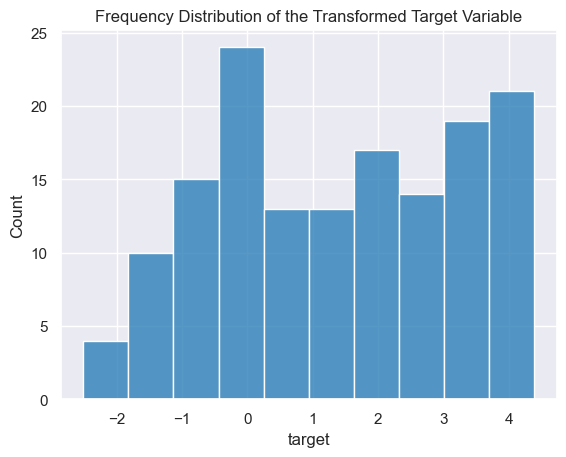

In [9]:
sns.histplot(np.log(y.target), bins=10)
plt.title("Frequency Distribution of the Transformed Target Variable")

* As seen from the graph above the skewness of the target variable was reduced but the distribution is not normal. It is ideal that the target variable is of a normal distribution since I'm using a linear regression model.
* If I should go along with the transformed varaible my model's predictions and preformance will be based on the transformed data, so to get the exact predictions I will have to apply the inverse transformation to the predicted values.
* I decided to use the original data because if I use the transformed data, interpretation of my model will be difficult, I wont be able to explain the model's coeeficient because the model will be trained on a transformed target variable. The goal of this project is to study the power radiated by a black body with an **explainable** supervised model. So I'm priortising an exlainable model over a model that has a better prediction.

### Checking the features 

Below I extracted the independent variables from the data 

In [10]:
X = data.drop('y', axis = 1)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.592109,0.545496,0.199054,2.370339,1.032510,1.137605,1.199802,-0.833456
1,0.911316,1.260952,0.446375,1.564526,0.820080,2.172268,1.441165,-0.373705
2,0.968683,3.744257,1.931173,1.472553,0.102181,4.712941,1.954805,1.828992
3,0.748656,2.741351,1.790573,1.696788,0.464028,3.490008,0.948294,1.326545
4,0.320502,3.196858,1.050494,2.813036,0.204284,3.517361,1.273237,0.846210


In [11]:
X.shape # Checking the dimension of the independent features

(150, 8)

* The indpendent features have 150 obersvations(rows) and 8 variables 

**A summary statistics of the independent feaatures**

In [12]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.526873,2.532959,1.004755,1.437147,0.608091,3.059833,1.005223,0.396664
std,0.287178,1.366323,0.591567,0.869658,0.365670,1.405730,0.418172,0.666874
min,0.000789,0.039299,0.022259,0.034008,0.000504,0.324586,0.097891,-1.012279
25%,0.286739,1.467144,0.484289,0.685930,0.263076,1.988572,0.748112,-0.100801
50%,0.538521,2.489126,1.025886,1.410161,0.628974,2.985679,0.979791,0.389450
75%,0.776970,3.650754,1.504459,2.163303,0.920787,4.241689,1.292235,0.892501
max,0.986514,4.981110,1.976849,2.993408,1.293620,5.960314,1.954805,1.910219


* From the above summary statistics, the mean and std(standard dieviation) shows that the features are not standardized because for features to be standardized the mean should be approximately zero and std approximately one.
* Standardardizing the features ensures that all features contribute equally to the model and allows for easier comparison of coefficients in the model.

## Training and testing a machine learning pipeline

**Spliting Data into Train Test**

Below features are be split into train-test. In scikit-learn, the library to randomly split data into train-test is train_test_split

<u>Parameter Explanation</u>
1. test_size: The proportion of the dataset to include in the test split.It is set to 0.3, meaning that 30% of the dataset will be used for testing and the remaining 70% for training.
2. random_state: A random seed value that ensures the reproducibility of the train-test split.
3. shuffle:Whether or not to shuffle the data before splitting.

In [13]:
from sklearn.model_selection import train_test_split

X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(X, y, test_size=0.3, random_state=101, shuffle= True)

### Pipeline containing Ordinary Least Squares (OLS) regression

The pipepline those the following steps:
    
  * Standardizes both the independent and dependent variables.
  * OLS regression on the standardized feature space
  * There is no transformation done in this pipeline

In [14]:
from sklearn.preprocessing import StandardScaler #Library to standardize data
from sklearn.linear_model import LinearRegression #Library to use OLS Regression
from sklearn.pipeline import Pipeline #Library to create a pipeline


#Building a Pipeline
pipe = Pipeline([('scaler', StandardScaler()), #scaling features
                 ('lm', LinearRegression())  #training a linear regression model
                ])

#Implementing the pipepline
pipe.fit(X_train_OLS, y_train_OLS)


#Predictions on the train and test data
y_train_pred = pipe.predict(X_train_OLS)
y_test_pred = pipe.predict(X_test_OLS)

#Accuracy of each model
R2_score_train = pipe.score(X_train_OLS, y_train_OLS)
R2_score_test = pipe.score(X_test_OLS, y_test_OLS)


print("R2 on train data:", R2_score_train)
print("R2 on test data:", R2_score_test)

R2 on train data: 0.7884891831576947
R2 on test data: 0.2508310242618388


**Accuracy of the model**

* The R squared value represent the proportion of the variance in the dependent variable that is predictable from the independent variables.
* An R2 of 0.7885 on the train data suggests that approximately 78.85% of the variability in the target variable is explained by the model. However, the R2 value for the test data is significantly lower at 0.2508, meaning that the model can only explain about 25.08% of the variability in the target variable.
* This substantial difference between the train and test R2 values indicates that the model is overfitting to the training data. 
* This particular model is not generalizing well to new, unseen data, I will further investigate why and apply other techniques.

**Checking for Linearity**

*Based on the poor R2 value on new unseen data from the previous cell, I will check first for linearity between the dependent variables and independent variables. If there's no linear relationship, it explains why the model is not generalizes well to new unseen data using an OLS algorithm*


The cell extracts the features and plots it against the dependent variable 

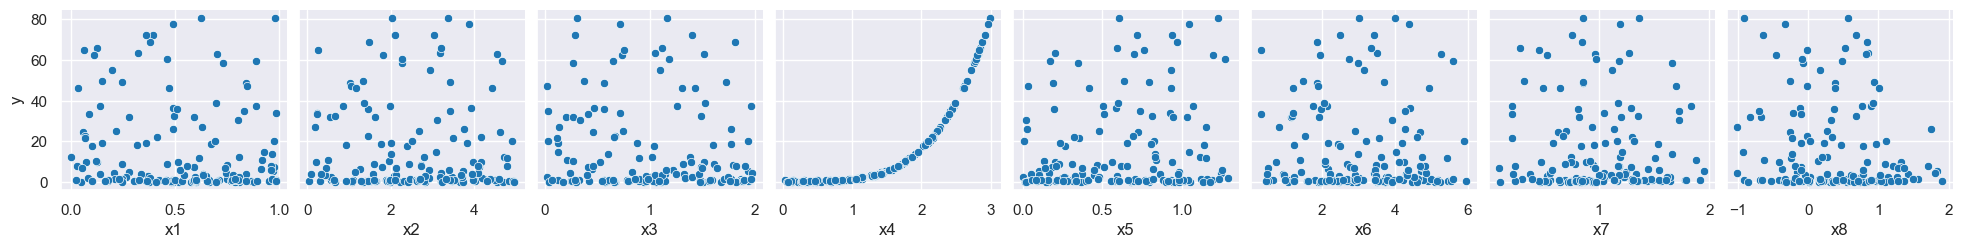

In [15]:
features = [col for col in data.columns if col != 'y'] #Using a list comprehension to extract the columns
sns.pairplot(data, x_vars = features, y_vars = 'y') #using pairplot to compare variable
plt.show()

* From the scatter plot above, it is evident that the dependent variable (y) is not linearly related to any independent variable. Thus, one of the reason for the poor OLS model performance on new unseen data. This violates the linearity assumption for linear regression, so maybe a Polynomial transformation on the features will give me better OLS model 

#### Creating a new pipeline that transforms the independent features

**Spilting data into Train, Validate and Test Set**

* The train data will be 70% of the dataset, X_other and y_other will be 30% which will be further split in half, 15% for evaluation and the other 15% for testing

In [16]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101, shuffle= True)

<u>**Libraries and parameter explanation of the cell below**</u>

* GridSearchCV: I used this library to search for the best hyperparameter, in this case the best polynomial degree to fit the data. GridSearchCv is a search technique used to find optimal hyperparameters for a given model. Here is a link to its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
    * How it works:
        * Creates a grid of possible hyperparameter values.
        * Trains the model with each combination of values.
        * Evaluates performance using cross-validation.
        * Selects the best-performing model as the final model.
        * <u>Parameters passed to the GridSearchCV</u>
             * estimator: The model pipeline (including preprocessing steps and the estimator) to be used in the grid search.
             * param_grid: A dictionary specifying the hyperparameters and their values to be tested in the grid search. In this case, the polynomial degree ranges from 1 to 5 that is used for the PolynomialFeatures in the pipeline .
             * scoring: The scoring metric used to evaluate the performance of the model. 'r2' indicates R-squared (coefficient of determination) is used.
             * cv=5: The number of cross-validation folds. In this case, 5-fold cross-validation is used.
             * n_jobs: The number of CPU cores to be used for parallel computation. '1' means using one core; '-1' would use all available cores.
* PolynomialFeatures: A library for generating polynomial and interaction features for the independent variables, to account for the non-linear relationship between the dependent and independent variables. Here's a link to its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [17]:
from sklearn.model_selection import GridSearchCV #importing the library for Grid Search Cross validation
from sklearn.preprocessing import PolynomialFeatures #importing the library for polynomial transformation
from sklearn.metrics import r2_score #importing the R-squared metric

pipe = Pipeline([('scaler', StandardScaler()), #scaling features
                ('poly', PolynomialFeatures(include_bias=False)), #transformation of the features
                ('lm2', LinearRegression())]) #training a linear regression model

grid_search = GridSearchCV(
    estimator=pipe, #the pipeline
    param_grid= {'poly__degree': np.arange(1, 6)}, #the parameter(s) used in the pipeline
    scoring='r2', #the scoring metric for selecting the best estimator(R-Squared)
    cv=5, #5-fold cross-validation
    n_jobs=1 #computational power for the grid serch
)

grid_search.fit(X_train, y_train) #fitting the train data to the best model

# Retrieving the best polynomial degree and model performance
best_degree = grid_search.best_params_['poly__degree']
best_r2 = grid_search.best_score_

print(f"The best polynomial degree is: {best_degree}")
print(f"The best R-squared score is: {best_r2}")

The best polynomial degree is: 2
The best R-squared score is: 0.9295815009312255


**Below is a Dataframe that shows the score for each cross validation and the rank score for each fold, degree 2 was ranked the best**

In [18]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results[['param_poly__degree','split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score','rank_test_score' ]]

,param_poly__degree,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,1,0.488262,0.780958,0.660687,0.848171,0.776209,0.710857,3
1,2,0.863406,0.929324,0.931801,0.954309,0.969067,0.929582,1
2,3,0.978426,0.945916,-2.615384,-0.710059,0.978232,-0.084574,5
3,4,0.504032,0.872784,0.932626,0.873395,0.889703,0.814508,2
4,5,0.655780,0.703415,0.708649,0.542603,0.639841,0.650058,4


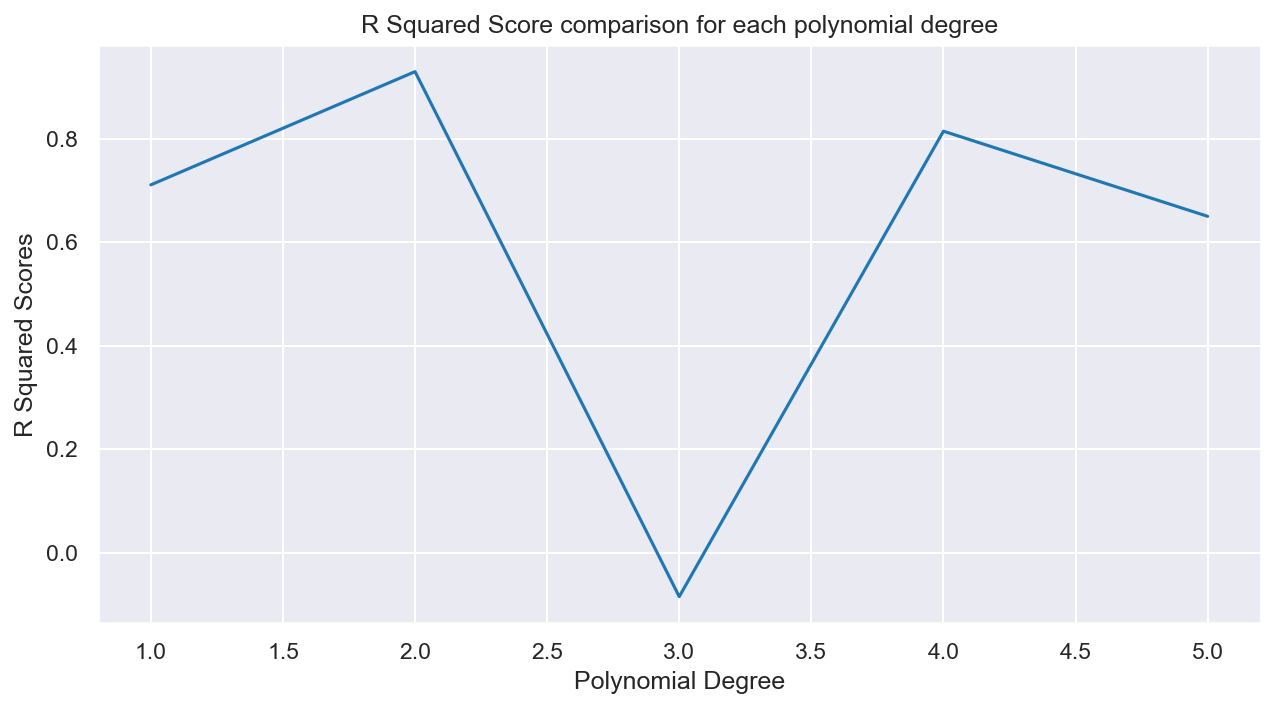

In [19]:
plt.figure(figsize=(10,5), dpi = 150)
sns.lineplot(data = cv_results, x = "param_poly__degree", y="mean_test_score")
plt.xlabel('Polynomial Degree')
plt.ylabel('R Squared Scores')
plt.title('R Squared Score comparison for each polynomial degree')
plt.show()

#### Validating and Testing the Linear regression on the Transformed Features

In [20]:
#Spliting the remaining data in half, evaluation and testing data
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101, shuffle= True) 
y_pred_val = grid_search.predict(X_val) #predict on evaluation data
val_r2 = r2_score(y_val, y_pred_val) #getting the R-squared on the evaluation data

print(f"The R-squared score on the evaluation set is: {val_r2}")

y_pred_test = grid_search.predict(X_test) #prediction on the test data
test_r2 = r2_score(y_test, y_pred_test)#getting the R-squared on the evaluation data

print(f"The R-squared score on the test set is: {test_r2}")

The R-squared score on the evaluation set is: 0.9385761229735896
The R-squared score on the test set is: 0.8899867216794068


* After transformation on the features to account for the non-linear relationship the model regression model was improved on the train set, from a R-Squared value of 0.788 to 0.929
* Evaluatiing the tuned model I got a some what better performance, a R-squared value of 0.938
* However, on the final test set the performance was not as great compared to the train and evaluation set, a R-squared value of 0.889
* This suggest that there's still overfitting of the model, the model is not generalizing as well to new, unseen data.
* The cell below I checked for multicollinearity of the features so that I can decide what will be the best regularization technique to use. The model might be too complex that's why its overfitting.
* Introducing a penalty term to the linear regression cost function(Regualarization) will reduce the complexity of the model, then maybe it will solve the overfitting issue.

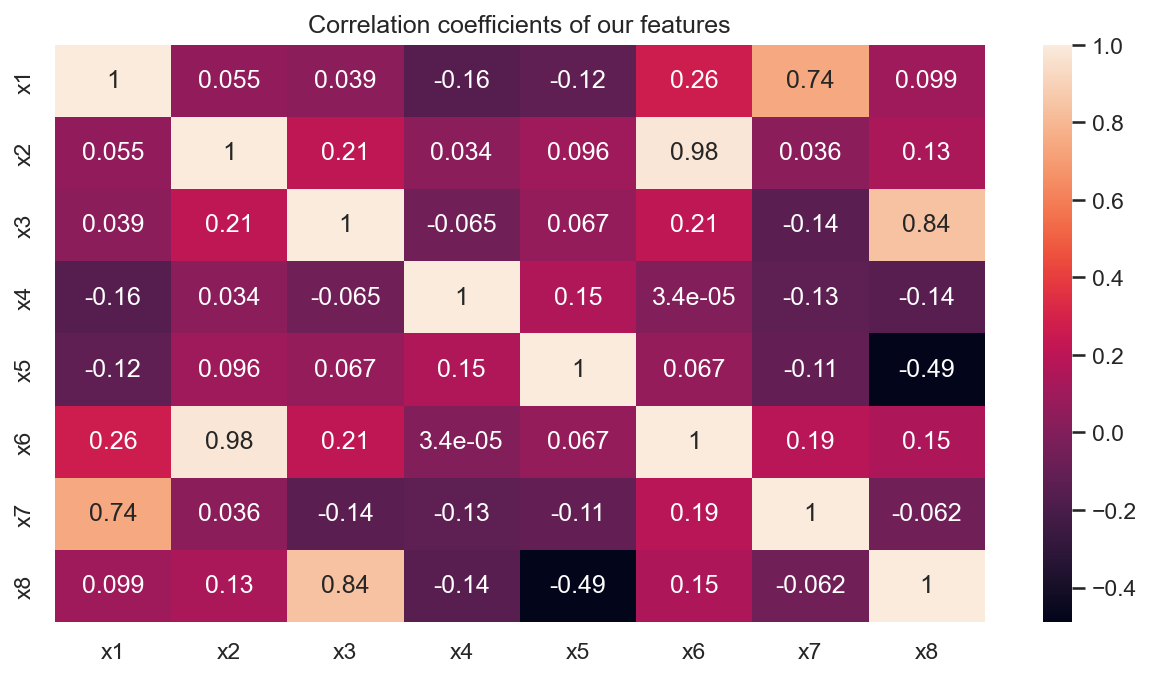

In [21]:
plt.figure(figsize=(10,5), dpi = 150)
sns.heatmap(X_train.corr(), annot=True)
plt.title('Correlation coefficients of our features')
plt.show()

* Some of the features are highly correlated, this is a multicollinearity issue hence leading to overfitting becasue the model becomes too complex trying to capture the complex relationships between correlated features rather than the underlying true relationship with the target variable. The features in the dataset is not so much, so feature selection is not an option for me else I will use L1 regularization.
* Ridge does not force any coefficients to be exactly zero, unlike Lasso(L1 regularization), which may cause some coefficients to become zero due to L1 regularization. This property of Ridge Regression allows it to maintain the contribution of all variables, distributing their effects on the target variable while reducing the impact of multicollinearity.
* I will use Ridge Regression in my new and final pipeline to check if the overfitting issue will be solved.

**A new pipeline in the gridsearchCV to implement Ridge regression**

* The code below implements a new pipeline with a ridge regression in the gridsearch. The hyperparameter "ridge__alpha" refers to the alpha parameter of the Ridge Regression model within the pipeline. The alpha parameter (also known as lambda) controls the regularization strength in Ridge Regression. A larger value of alpha results in stronger regularization and shrinks the coefficients more, which helps prevent overfitting.

* The np.logspace(-5, 5, 20) function generates an array of 20 values evenly spaced on a logarithmic scale between 10^(-5) and 10^(5). This allows the GridSearchCV to explore a wide range of alpha values, from very small to very large, in order to find the best regularization strength for the Ridge Regression model.

* As the value of alpha increases the regularization strength increases, leading to a stronger effect on the coefficients that is a greater shrinkage of the coefficients leading to a simpler model that helps preventing overfitting but may increase bias *Bias Variance Trade off*

* The GridSearchCV will perform a 5-fold cross-validation (specified by cv=5) for each of the 20 alpha values in the search space, evaluating the model performance using the R-squared ('r2') scoring metric.

In [22]:
from sklearn.linear_model import Ridge #importing the Ridge Regression library

pipe = Pipeline([('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('ridge', Ridge())])


grid_search_ridge = GridSearchCV(
    estimator=pipe,
    param_grid= {'ridge__alpha': np.logspace(-5, 5, 20)}, # Search for the best alpha value on a log scale
    scoring='r2',
    cv=5, #5-fold cross-validation
    n_jobs=1
)

grid_search_ridge.fit(X_train, y_train) #training the model with the best alpha value


best_alpha = grid_search_ridge.best_params_['ridge__alpha'] #getting the best alpha value
best_r2 = grid_search_ridge.best_score_ #get the best R-Squared score

print(f"tunedAlpha value is: {best_alpha}")
print(f"The best R-squared score is: {best_r2}")

tunedAlpha value is: 1.8329807108324339
The best R-squared score is: 0.9656863379238068


**Below is a Dataset for each 20 alpha values showing the test scores and ranks**

In [23]:
cv_results_lasso = pd.DataFrame(grid_search_ridge.cv_results_)
cv_results_lasso[['param_ridge__alpha','split0_test_score','split1_test_score','split2_test_score',
                  'split3_test_score','split4_test_score','mean_test_score','rank_test_score']]

,param_ridge__alpha,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,0.00001,0.939822,0.970988,0.957299,0.961484,0.982878,0.962494,11
1,0.000034,0.939822,0.970988,0.957299,0.961484,0.982878,0.962494,10
2,0.000113,0.939823,0.970988,0.957299,0.961485,0.982878,0.962495,9
3,0.000379,0.939824,0.970990,0.957298,0.961488,0.982878,0.962496,8
4,0.001274,0.939829,0.970995,0.957297,0.961499,0.982878,0.962499,7
5,0.004281,0.939843,0.971012,0.957291,0.961534,0.982879,0.962512,6
6,0.014384,0.939893,0.971068,0.957274,0.961651,0.982883,0.962554,5
7,0.048329,0.940056,0.971253,0.957214,0.962036,0.982893,0.962690,4
8,0.162378,0.940579,0.971846,0.957008,0.963229,0.982921,0.963117,3
9,0.545559,0.942052,0.973543,0.956252,0.966379,0.982930,0.964231,2


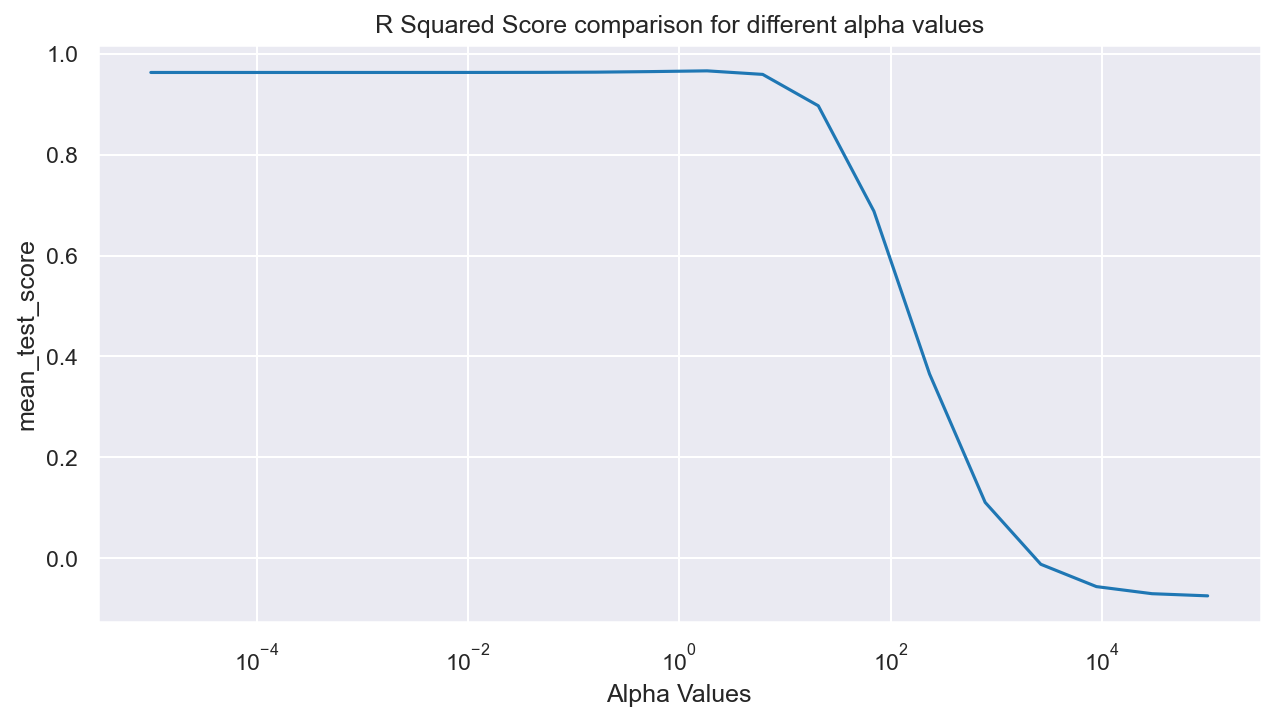

In [24]:
plt.figure(figsize=(10,5), dpi = 150)
sns.lineplot(data = cv_results_lasso, x = 'param_ridge__alpha',
             y='mean_test_score')
plt.xlabel('Alpha Values')
plt.xscale('log')
plt.ylabel('mean_test_score')
plt.title('R Squared Score comparison for different alpha values')
plt.show()

#### Evaluating and Testing the Ridge Regression Pipeline

In [25]:
#Spilting data into test and evaluation
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101, shuffle= True) 

#Predicting and testing on the evaluation data
y_pred_val = grid_search_ridge.predict(X_val)
val_r2 = r2_score(y_val, y_pred_val)

print(f"The R-squared score on the evaluation set is: {val_r2}")


#Predicting and Testing on the test data 
y_pred_test = grid_search_ridge.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"The R-squared score on the test set is: {test_r2}")

The R-squared score on the evaluation set is: 0.9530445746747335
The R-squared score on the test set is: 0.930157718116802


* tunedAlpha value is: 1.8329807108324339
* The best R-squared score on Train data: 0.9656863379238068
* The R-squared score on the evaluation set is: 0.9530445746747335
* The R-squared score on the test set is: 0.930157718116802

* After tuning and applying regularization, the model's performance on new unseen data is improved but according to the test result the model still somewhat *overfits* to the train data.

#### Checking the accuracy for OLS model and Ridge Regression

In [26]:
from sklearn.metrics import mean_squared_error

#Accuracy scorces
MSE_ridge = mean_squared_error(y_pred_val, y_val)
MSE_OLS = mean_squared_error(y_test_pred, y_test_OLS )

val_r2 = r2_score(y_val, y_pred_val)
R2_score_test = r2_score(y_test_OLS, y_test_pred)

print("MSE on the evaluation data for ridge regression", MSE_ridge)
print("MSE on the test data for OLS", MSE_OLS)
print("----")
print(f"The R-squared score on the evaluation set for ridge regression: {val_r2}")
print(f"The R-squared score on the evaluation set for OLS: {R2_score_test}")

MSE on the evaluation data for ridge regression 9.710424876666991
MSE on the test data for OLS 113.61507391132903
----
The R-squared score on the evaluation set for ridge regression: 0.9530445746747335
The R-squared score on the evaluation set for OLS: 0.2508310242618388


* The Ridge Regression model outperformes the OLS model by a great margin

### Residual Analysis 

Assumptions for regression models are verified below:

* normality of residuals
* independence of residuals



**Below is a Dataframe containing actual value, fitted values and residuals on validation data.**

In [27]:
validation = pd.DataFrame({'actual': y_val['target'], 'fitted': y_pred_val.ravel()})
validation['residuals'] = validation.actual - validation.fitted
validation.describe()

,actual,fitted,residuals
count,22.000000,22.000000,22.000000
mean,11.813018,12.886503,-1.073484
std,14.718987,15.566672,2.994258
min,0.081166,-3.624348,-5.830626
25%,0.507829,0.614393,-3.200254
50%,4.875346,6.798045,-1.009991
75%,18.964717,24.194087,1.612471
max,46.057095,44.275102,4.569644


<Figure size 900x750 with 0 Axes>

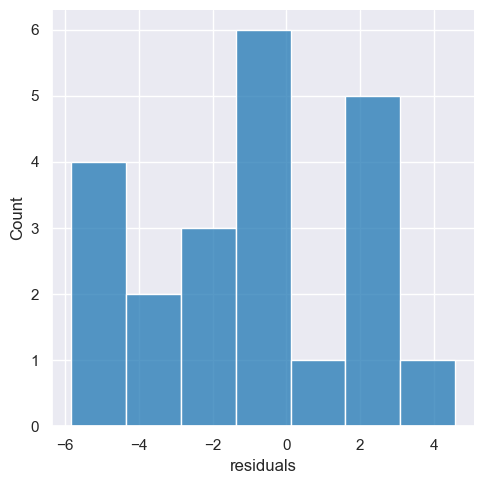

In [28]:
plt.figure(figsize=(6,5), dpi = 150)
sns.displot(validation, x = 'residuals', bins = 7)

Residuals violates the normality assumption. Residuals should be normally distributed.

The two plots below investigates the independence of residuals.

<Figure size 900x750 with 0 Axes>

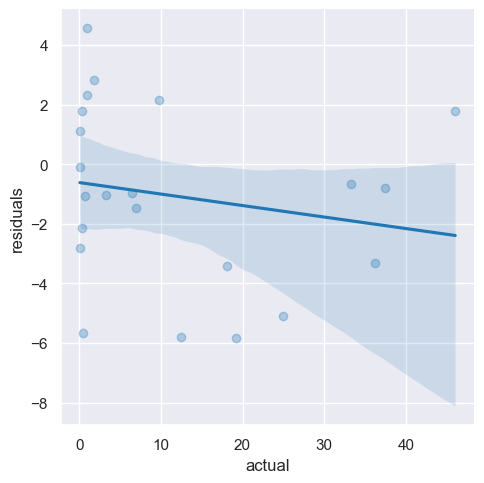

In [29]:
plt.figure(figsize=(6,5), dpi = 150)
sns.lmplot(data=validation, x = 'actual', y = 'residuals', scatter_kws = {'alpha': 0.3})

<Figure size 900x750 with 0 Axes>

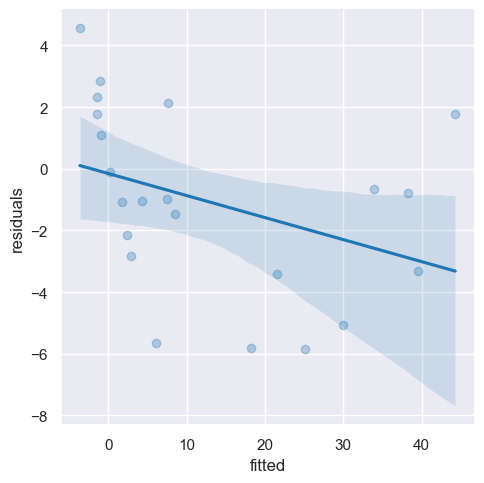

In [30]:
plt.figure(figsize=(6,5), dpi = 150)
sns.lmplot(data=validation, x = 'fitted', y = 'residuals', scatter_kws = {'alpha': 0.3})

Residuals are somewhat random to both actual and fitted values, one of the assumption is met

### A Closer Analysis of the Pipelines

Below I train on the OLS model pipeline and Ridge model pipeline on the whole data set. I standardized the data and applied the best polynomial transform gotten from the gridsearch, I also used the best alpha value from the second pipeline to build the ridge regression pipeline.

In [31]:
pipe_ols = Pipeline([('scaler', StandardScaler()), ('pol', PolynomialFeatures(degree=best_degree, include_bias= False)), 
                      ('ols', LinearRegression())])

pipe_ridge=Pipeline([('scaler', StandardScaler()), ('pol', PolynomialFeatures(degree=best_degree, include_bias=False)),
                      ('ridge', Ridge(alpha=best_alpha, tol=1e-1))])

#Training the OLS pipeline on the whole data
pipe_ols.fit(X, y)

#Training the Ridge pipeline on the whole data
pipe_ridge.fit(X, y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('pol', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=1.8329807108324339, tol=0.1))])

The dataframe below shows the beta coefficients for the OLS and tuned Ridge Regression built on the whole data.

In [32]:
betas = pd.DataFrame({"OLS_coef": pipe_ols.named_steps['ols'].coef_.ravel(), "ridge_coef": pipe_ridge.named_steps['ridge'].coef_.ravel()})
betas.describe()

,OLS_coef,ridge_coef
count,4.400000e+01,44.000000
mean,-4.431032e+10,0.617093
std,1.932421e+12,3.033528
min,-5.175383e+12,-0.670535
25%,-2.599336e+10,-0.217097
50%,-2.306952e+07,0.038139
75%,7.512507e+08,0.211903
max,8.373091e+12,16.638159


* OLS regression coefficient are far away from zero than ridge coefficient, therefore the OLS regression is a more complex model thus explains why its fitting to the noise in the data(overfitting), therefore it won't generalizes well to new unseen data as compared to the Ridge model.
* The Ridge regression model has more reliable and stable coefficients than the OLS model which is visually investigated in the cells below

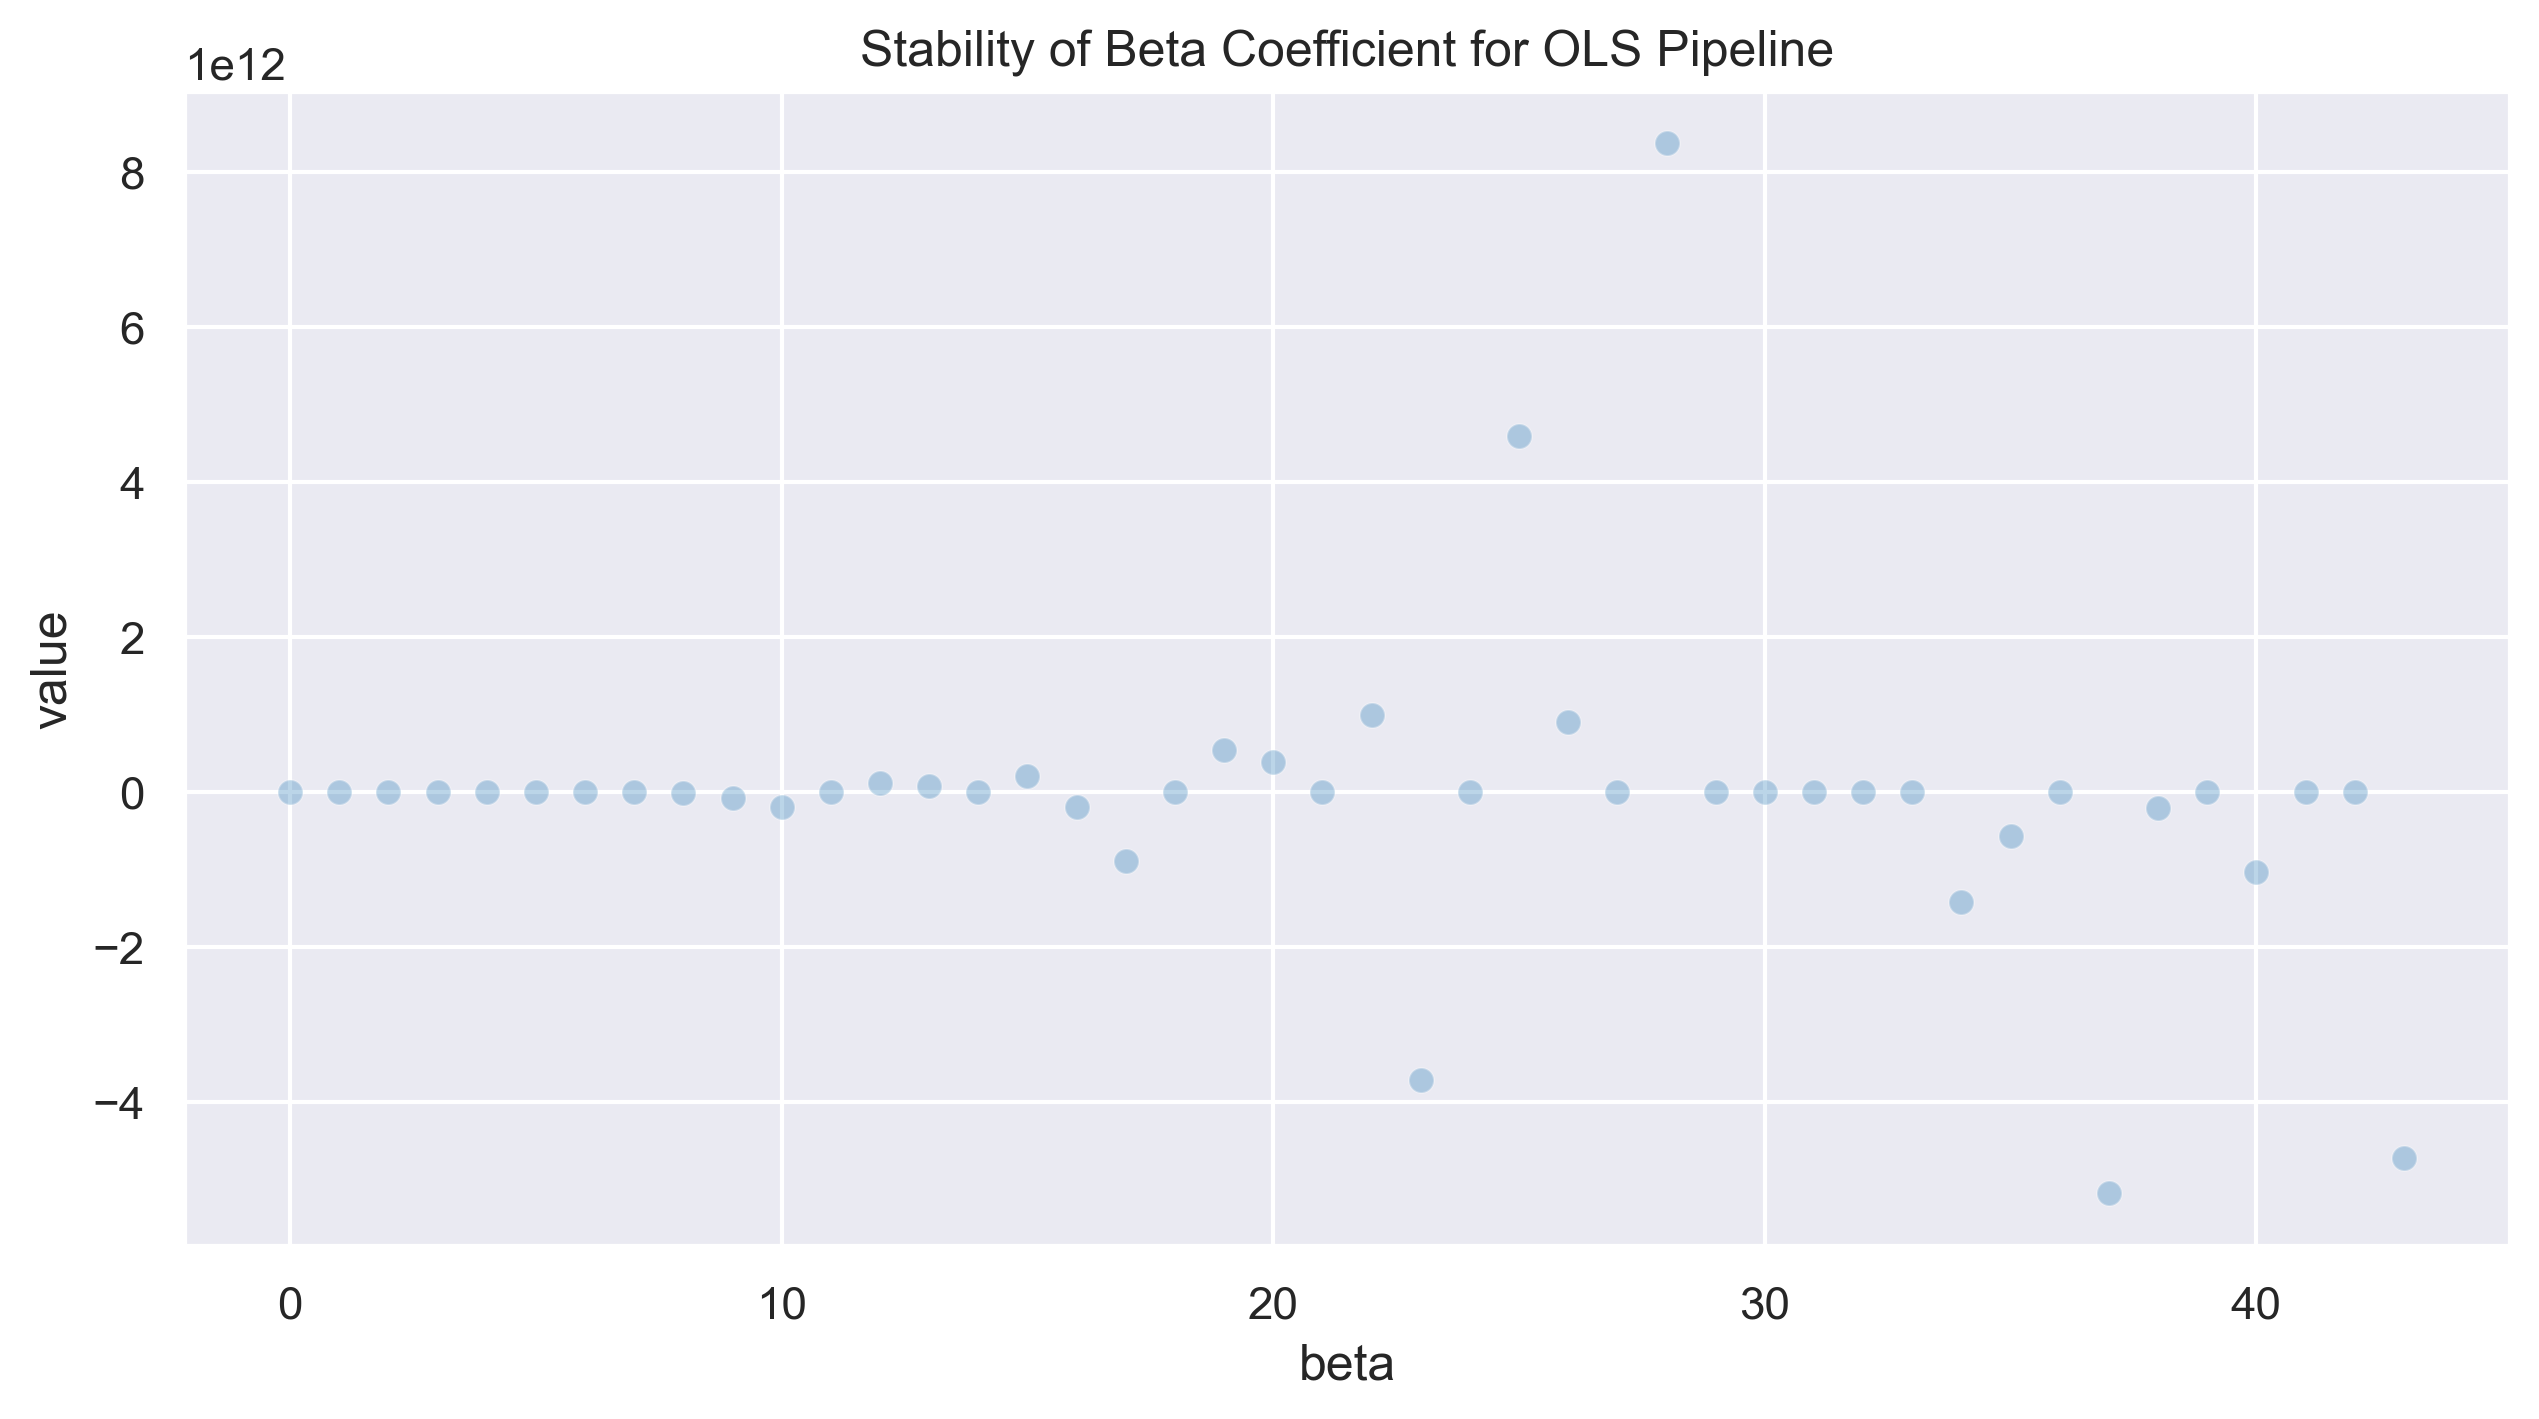

In [33]:
df = pd.DataFrame(pipe_ols.named_steps['ols'].coef_.T)
df["beta"] = range(0, pipe_ols.named_steps['ols'].coef_.shape[1])
df_melt = pd.melt(df, id_vars=['beta'])


plt.figure(figsize=(10, 5), dpi = 300)
sns.scatterplot(data = df_melt, x="beta", y="value", alpha=.3)
plt.title("Stability of Beta Coefficient for OLS Pipeline")
plt.show()

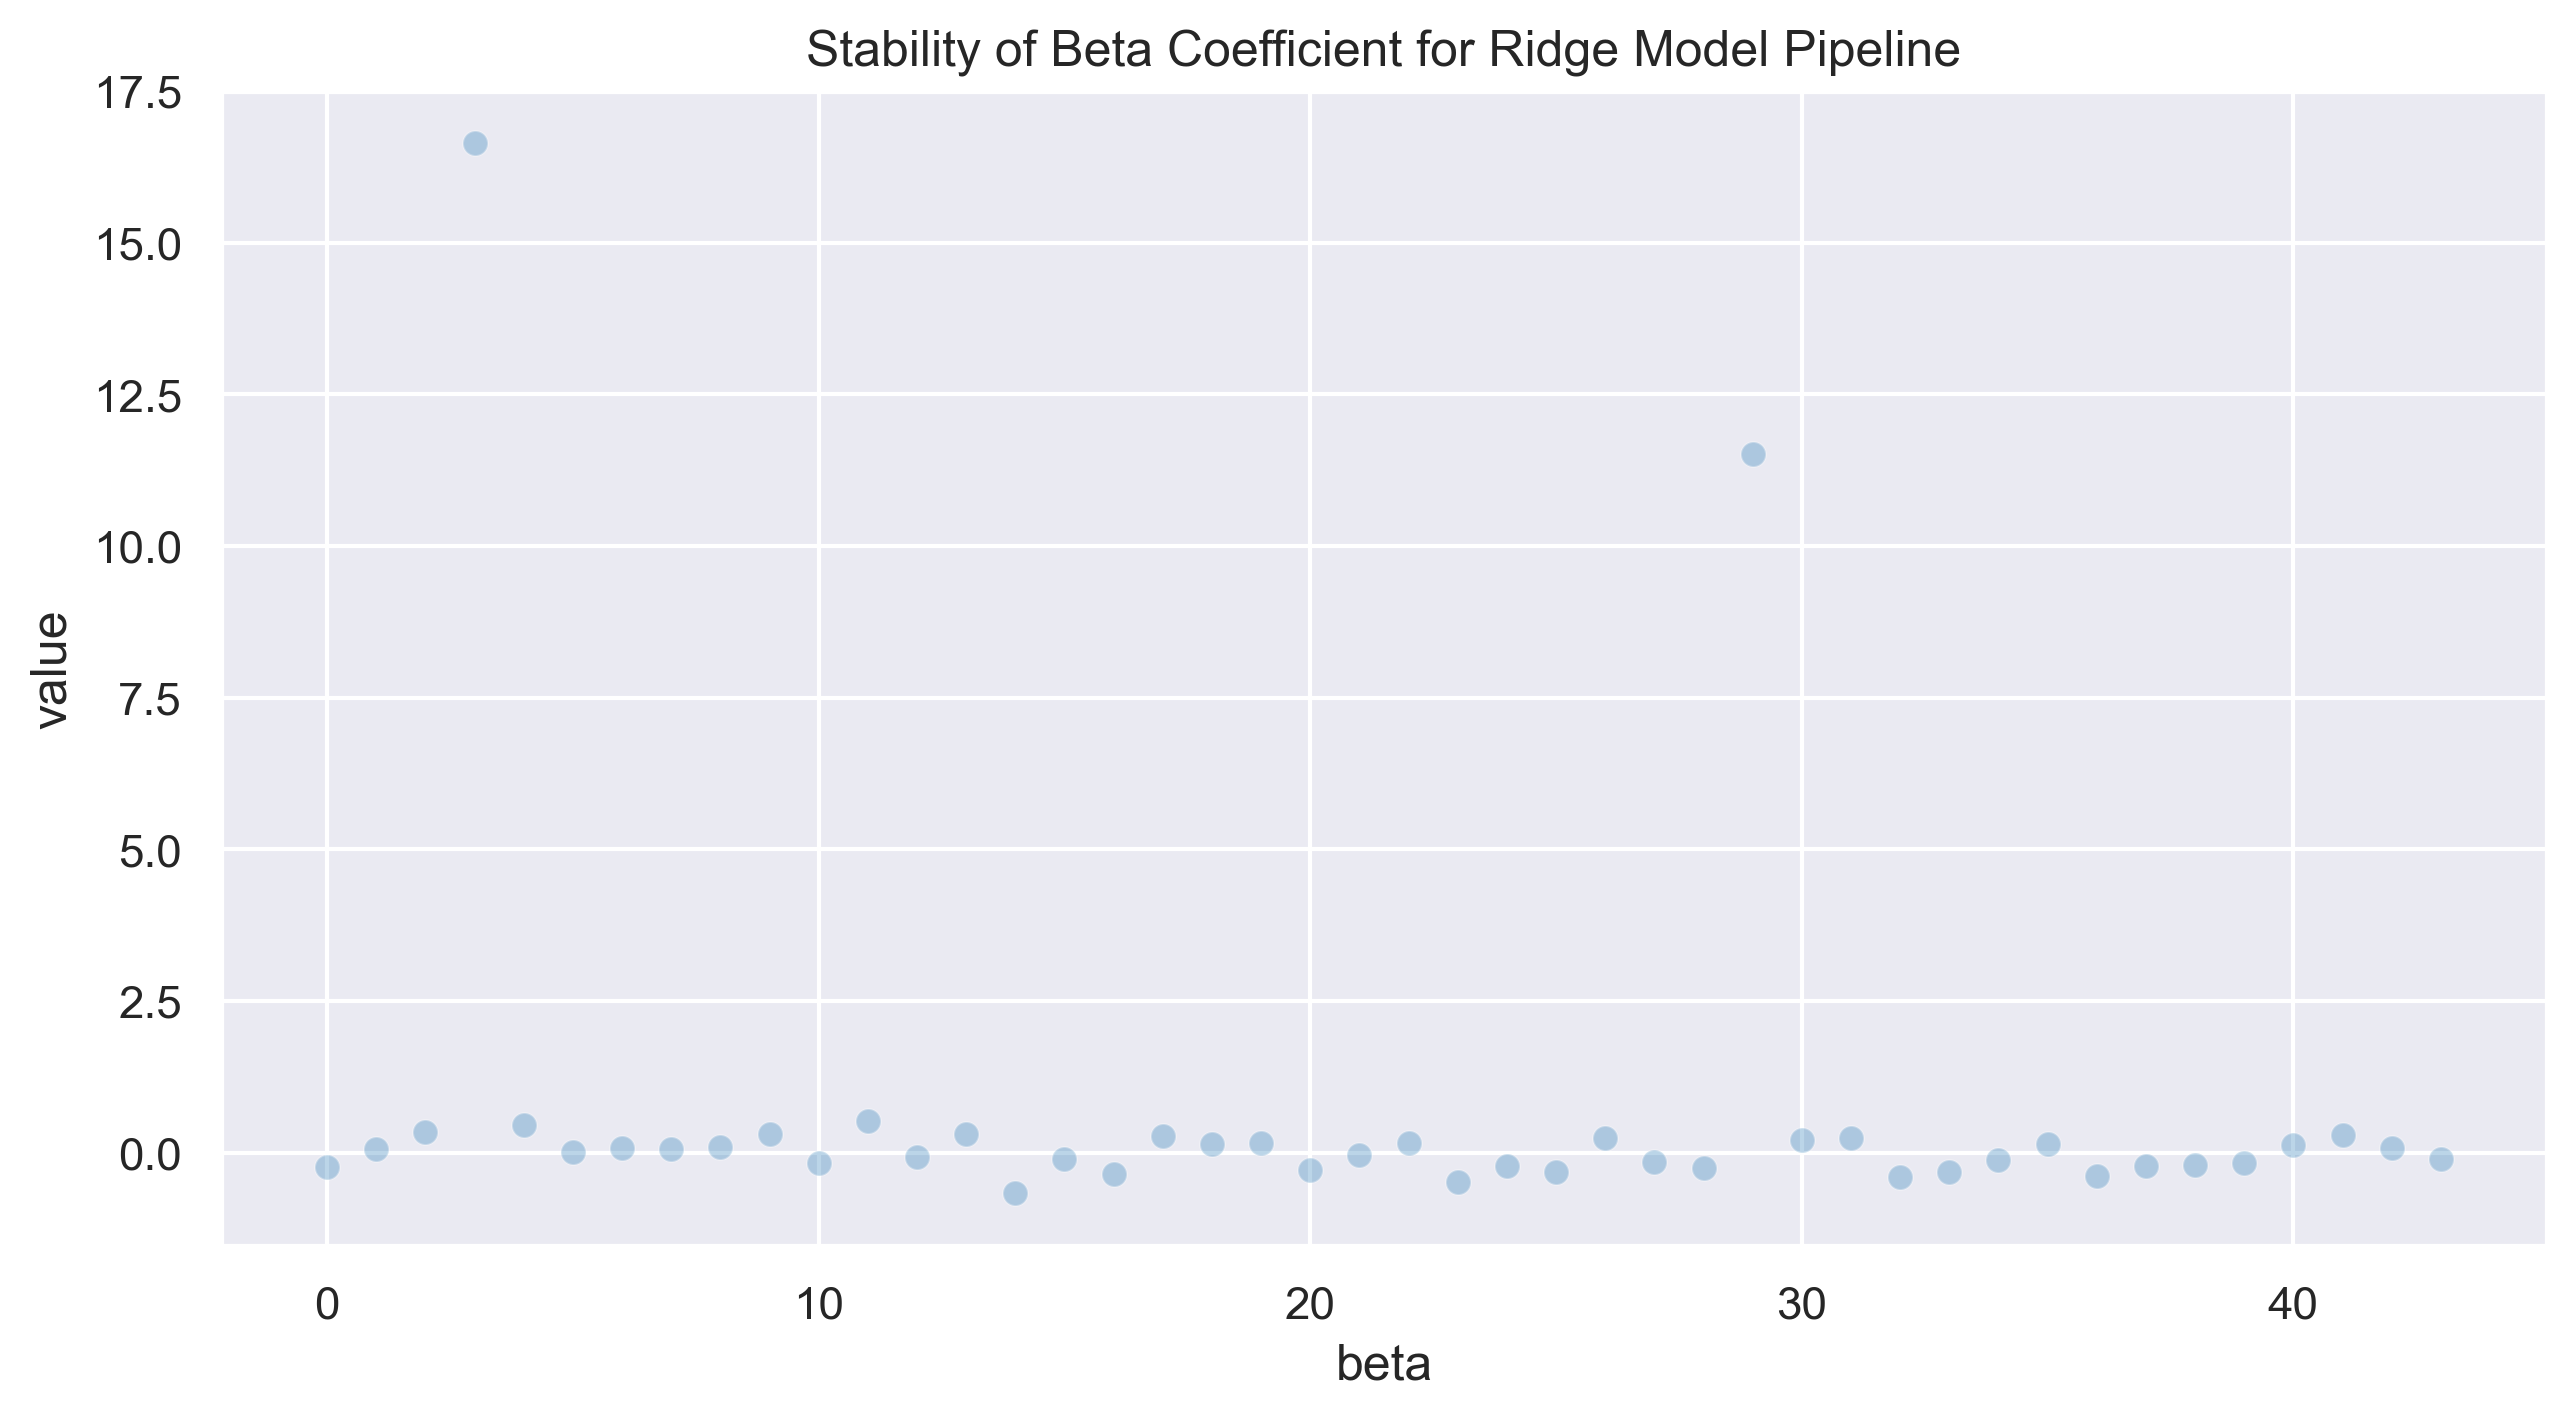

In [34]:
df = pd.DataFrame(pipe_ridge.named_steps['ridge'].coef_.T)
df["beta"] = range(0, pipe_ridge.named_steps['ridge'].coef_.shape[1])
df_melt = pd.melt(df, id_vars=['beta'])

plt.figure(figsize=(10, 5), dpi = 300)
plt.title("Stability of Beta Coefficient for Ridge Model Pipeline")
sns.scatterplot(data = df_melt, x="beta", y="value", alpha=.3)
plt.show()

# Model Intrepretation and Discussion

* My proposed pipeline will be the one that includes the ridge regression model, named pipe_ridge. Although it somewhat overfits the training data, as observed during the tuning, evaluation, and testing phases. The pipe_ridge gives more stable coefficients than the OLS model, as seen in the visualization above. However, the pipeline is not entirely human-interpretable due to the multicollinearity between the features (refer to the heatmap for correlation). When features are highly correlated, it becomes difficult for the model to determine the individual contribution of each feature to the target variable. The effect of one feature on the target variable is challenging to isolate from the effects of correlated features. This makes it harder to understand the true relationship between each feature and the target variable.

* In the cells below I try to get the features that are more responsible for the proposed pipeline

**Transformed Features used in the pipeline**

In [35]:
#getting feature names of the transformed data
feature_names = pipe_ridge.named_steps['pol'].get_feature_names_out() 
feature_names

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2', 'x0 x1',
       'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x1^2',
       'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x2^2',
       'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2', 'x3 x4',
       'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7',
       'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2'], dtype=object)

* The features and interactions after transformation infers the linear regression function
    * y = f(x1,x2,x0^2,,,xm)

Below is a dataframe showing the features that are most responsible for the predictions

In [36]:
#getting feature names of the transformed data
feature_names = pipe_ridge.named_steps['pol'].get_feature_names_out() 

# Extract the coefficients of the ridge model
coefficients = pipe_ridge.named_steps['ridge'].coef_

# Matching the coefficients with the corresponding feature names
coef_dict = {}
for feature_name, coef in zip(feature_names, coefficients.ravel()):
    coef_dict[feature_name] = coef



coeff_strength = pd.DataFrame(data = {"coef_strength": coef_dict})
coeff_strength.sort_values(by = 'coef_strength',ascending=False).iloc[:10]

,coef_strength
x3,16.638159
x3^2,11.514184
x0 x3,0.528496
x4,0.449001
x2,0.344839
x0 x5,0.313288
x0 x1,0.301665
x6^2,0.289772
x1 x2,0.279313
x3 x5,0.246963


* It is evident from the above dataframe that variable x3 has the most influence for predictions which is closely followed by its polynomial transformation to degree 2.

### Time Complexity for the Proposed Pipeline

* Time complexity components:
    * Polynomial Features generation
    * Ridge regression model training
    * Grid search for hyperparameter tuning
    * 5-fold cross-validation
    
* Time complexity analysis:
    * Polynomial Features (degree=2, include_bias=False): Time complexity: O(n^2) for each sample, where n is the number of features
    * Ridge Regression: Time complexity: O(n * a^2) for training, where n is the number of samples and a is the number of features
    * Grid Search: Time complexity: O(k * g) for each model, where k is the number of cross-validation folds (5) and g is the number of grid points (20) aplha values
    * Cross-validation: Time complexity: O(k) for each model, where k is the number of cross-validation folds (5)
    
    
* Total Time Complexity:
   1. Polynomial Features: O(n^2)
   2. Ridge Regression: O(n * a^2)
   3. Grid Search: O(k * g)
   4. Cross-validation: O(k)
   * Considering that both the Grid Search and Cross-validation steps are part of the same process. Therefore, their time complexities are combined as O(k * g). Also, the Ridge Regression is performed within the Grid Search, so its time complexity will be multiplied by O(k * g).

        **Total time complexity: O(n^2) + O(n * a^2 * k * g)**
        
        
* Highest impact steps:

    * Polynomial Features generation: quadratic expansion of features increases the dataset size, which slows down the model training and validation and it will even have higher impact if the dataset is increased.
    * Grid Search: training and validating the model for the best hyperparameter tuning increases the total computation time, especially for larger datasets

## Strengths, Limitation and Possible ways to improve the Pipeline

* Strength of the pipeline:
    * Interpretability: The proposed pipeline has stable coefficients which makes it easier to interpret and understand since the relationships between the features and the target variable remain consistent.
    
    * Robustness: Stable coefficients indicate that the pipeline is robust and less susceptible to noise in the data, making its predictions more reliable.
    
    * Generalizability: The pipeline is more likely to generalize well to new, unseen data, as it is less prone to overfitting.
    
    
* Limitation of the pipeline:
    * Skewed target variable: The designed pipeline is built on a skewed target variable which may not accurately represent the relationship between the features and the target variable if the target variable is heavily skewed. It could result in biased predictions, and the pipeline may not perform well on data with a different target variable distribution.
    * Multicollinearity: The presence of multicollinearity among features can lead to unstable coefficients even though this was mitigated by applying the ridge regualarization, multicollinearity makes it difficult to interpret the importance of individual features. The pipeline's performance may also suffer due to the high interdependence of features. In this case, variable x3 which is the feature most responsible for the predictions is highly correlated with x8 (check heatmap above) so this is an issue to take not of.
    

* Possible ways to improve the pipeline:
    * Collect more training data to reduce overfitting and improve the pipeline's generalization to new unseendata because even after tuning the pipeline is slightly overfits to the train data because there is not enough train data.
    * Improve on the quality of data. The target variable was highly skewed thus the reason why the residuals violated the normality assumptions for Linear regression.